# Audio Dispersion
In this project I am going to experiment  audio  dispersion using Phyphox app. I am interested to do a simple task; using FFT to cleanout audio data by denoising lower frequencies from the signal in jupyter notebook and Phyphox. Phyphox is an app that uses the sensors in a smartphone to perform physics experiments. The app is developed by  RWTH Aachen University, Germany. More about phyphox can be found  on [PhyPhox](http://phyphox.org) website.\
Audio dispersion is also done with Broadband Transmision Method . This method requires the measurements of a reference velocity to obtain values for the acoustic dispersion in different medium. In our case we will do it simply by taking fourier transform in Jupyter Notebook.

The goal is to clean out noisy Audio signal by Audio dispersion. We will take noisy audio data with Phyphox and than by using  fourer transform we will be able to remove some noisy frequencies.

### Waves and Dispersion: 
When a wave is a distrubance in a medium (like waves in water) which propagate through the medeum,without moving of the medium.A travelling wave can be described by the following  equation:\
                $ y(x,t) = asin(kx−ωt) $ \
Here,\
y(x,t) : The height of the wave at position x, and time t \
a : The amplitude of the wave\
k : The wave number\
ω : The angular frequency. 

The speed at which the wave propagate is given by:   v = w/k . 
More about traveling waves can be found [Here](https://openstax.org/books/university-physics-volume-1/pages/16-1-traveling-waves)

If multiple waves such as\
$ y_1= a_1sin(k_1x−ω_1t)$,\
$y_2 = a_2sin(k_2x−ω_2t)$\
............ \
 travels together , the equation of the resultant wave is given by their sum:\
$ y_{sum} = a_1sin(k_1x−ω_1t)+a_2sin(k_2x−ω_2t)+......$

The amplitude of the resultant wave depends on the frquency of each wave.  

Lets for $ w_1$  and $ w_2 $ 
If $ ω_1/k_1 = ω_2/k_2  $ , both  waves  propagate at the same speed, there will be no dispersion,the shape of the resultant function does not change as it moves forward.  But  when waves of different frequencies propagate at different speeds it causes Dispersion, and the shape of the resultant wave changes as it moves through medium.  The plots of  the wave fronts of the above waves are given below : 

## Plot of  $ y_1 $

![image](data/sin1.PNG)

## Plot of $y_2$ 

![image](data/sin2.PNG)

## Plot of  $ y_{sum} $

<img src="data/sin33.PNG" alt="drawing" width="600"/>

### Algorithm :

In this project , I am going to use Fourier Transform to experiment the dispersion in sound wave. Fourer transform will allow us to convert the audio signal from the  time domain to the frequency domain. Fourier transform is a means of mapping a signal, in the time or space domain into its spectrum in the frequency domain. The time and frequency domains are just alternative ways of representing signals and the Fourier transform is the mathematical relationship between the two representations. A change of signal in one domain would also affect the signal in the other domain, but not necessarily in the same way. 


### Conversion from time Domain to frequency domain by FT

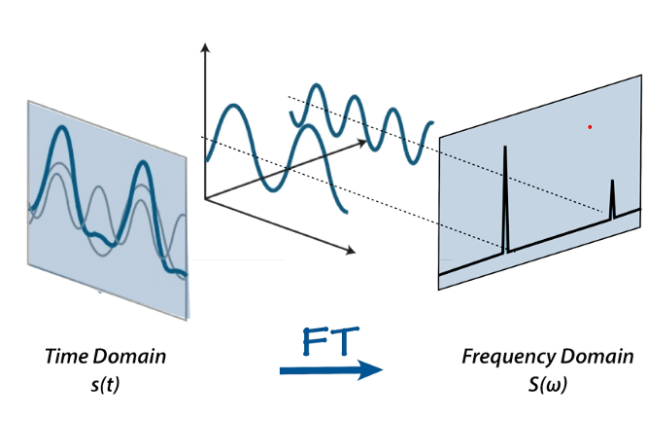

Fig : [Fourier Transform](https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520)

### DFT  vs FFT
---
Discrete Fourier Transform (DFT) is a transform like Fourier transform used with digitized signals. As the name suggests, it is the discrete version of the FT that views both the time domain and frequency domain as periodic. Fast Fourier Transform, or FFT, is a computational algorithm that reduces the computing time and complexity of large transforms. FFT is just an algorithm used for fast computation of the DFT.
![IMAGE](Data/fft1.png)

A DFT can be performed as O($N^2$) in time complexity, whereas FFT reduces the time complexity in the order of O (NlogN). DFT can be used in many digital processing systems across a variety of applications such as calculating a signal’s frequency spectrum, solving partial differential applications, detection of targets from radar echoes, correlation analysis, computing polynomial multiplication, spectral analysis, and more. FFT has been widely used for acoustic measurements in churches and concert halls. Other applications of FFT include spectral analysis in analog video measurements, large integer and polynomial multiplication, filtering algorithms, computing isotopic distributions, calculating Fourier series coefficients, calculating convolutions, generating low frequency noise, designing kinoforms, performing dense structured matrices, image processing, and more. 
![IMAGE](Data/fft2.png)


The inverse Fourier Transform will allow us the reverese the process by converting signal  from frequency domain to the time domain. 

# Taking audio data  with Phyphox app. 

Using the phyphox app, I have recorded audio data from the sound of waterfall (from tap).From the audio data, I am going to denosie the audio signal using  FFT. Phyphox uses the cellphones microphone to record the audio amplitudes. For this experiment I have recorded the sound of waterfall for 1 minute.  The screen shot of the data visualization (generated by the app) is shown below : 
![image](Data/amp.png)

### Importing necessary libraries
For the data visualization , I am going to use Pandas, more about pandas can be found  [here](https://pandas.pydata.org/docs/index.html). I am going to use numpy and matplotlib to visualize the data. I am also going to use scipy to take the Fourer transform of the audio data .

In [45]:
import numpy as np
import pandas as pd
# Import ploting tool
import matplotlib.pyplot as plt
# Linting tool
%load_ext pycodestyle_magic
%pycodestyle_on

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


### Loading audio data in jupyter notebook. 
From the phyphox app, we can export the audio data as a ".csv" file which we will use in the following analysis.

In [46]:
# reading csv file
df = pd.read_csv('Data/Amplitudes.csv', sep=',')
# Reading csv file as dataframe and assigning them as data series.
amplitude = df["Sound pressure level (dB)"]
time = df["Time (s)"]

### Visualization of audio data in Time-domain 
If we plot the Amplitude vs time  the visual information we get is here :

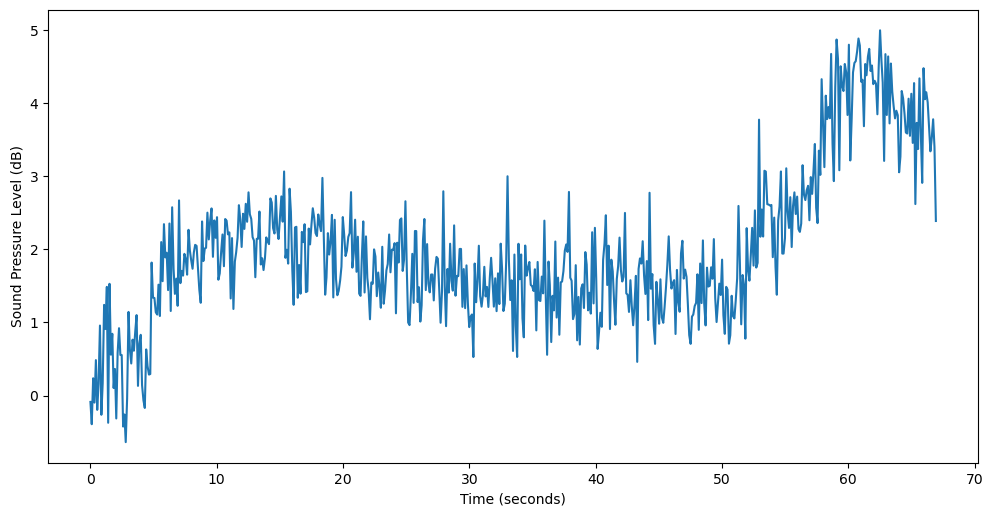

In [47]:
plt.figure(figsize=[12, 6])
plt.rcParams["figure.dpi"] = 100
plt.plot(time, amplitude)
plt.xlabel("Time (seconds)")
plt.ylabel("Sound Pressure Level (dB)")
plt.show()

This is the same plot as it was shown by the phyphox app. 

### Converting to frequency domain by Fast Fourier Transform

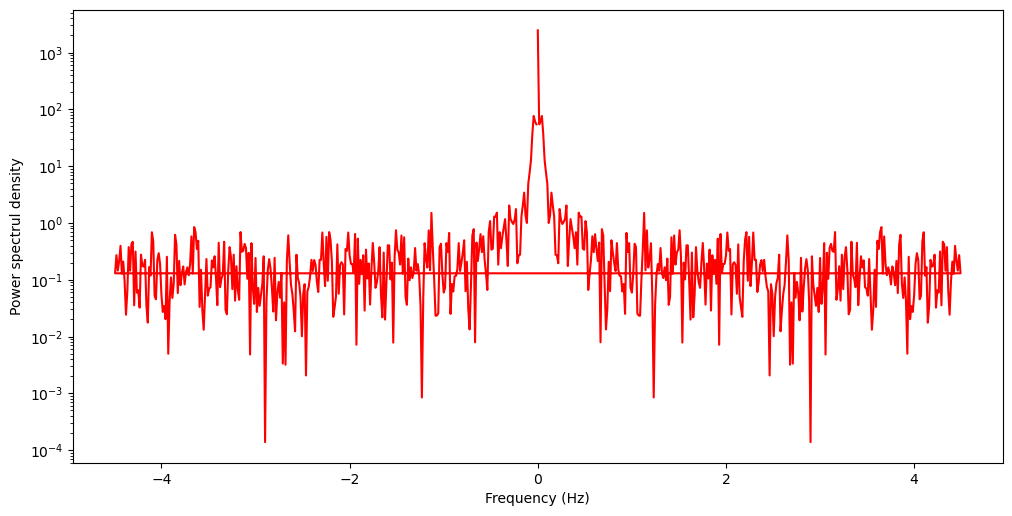

In [50]:
# Necessary imports for FFT
from scipy.fft import fft, fftfreq, rfft, rfftfreq
# from scipy import signal

# Number of samples in normalized_tone
sampling_rate = round(len(amplitude)/time[len(time)-1])
N = sampling_rate * time[len(time)-1]

amplitude_fft = fft(amplitude.to_numpy())
psd = amplitude_fft * np.conj(amplitude_fft) / len(time)

# Getting frequency
freqs = fftfreq(psd.shape[0], 1 / sampling_rate)

plt.figure(figsize=[12, 6])
# Converting y axis to log scale
plt.yscale('log')
plt.ylabel("Power spectrul density")
plt.xlabel("Frequency (Hz)")
plt.plot(freqs, np.abs(psd), color='red')
plt.show()

### Denoising the signal
Lests say I am going to neglect all signal with  below PSD  of  0.2 , so I will set a threshold at 0.2 so that it will filter out all the signals below this value. 

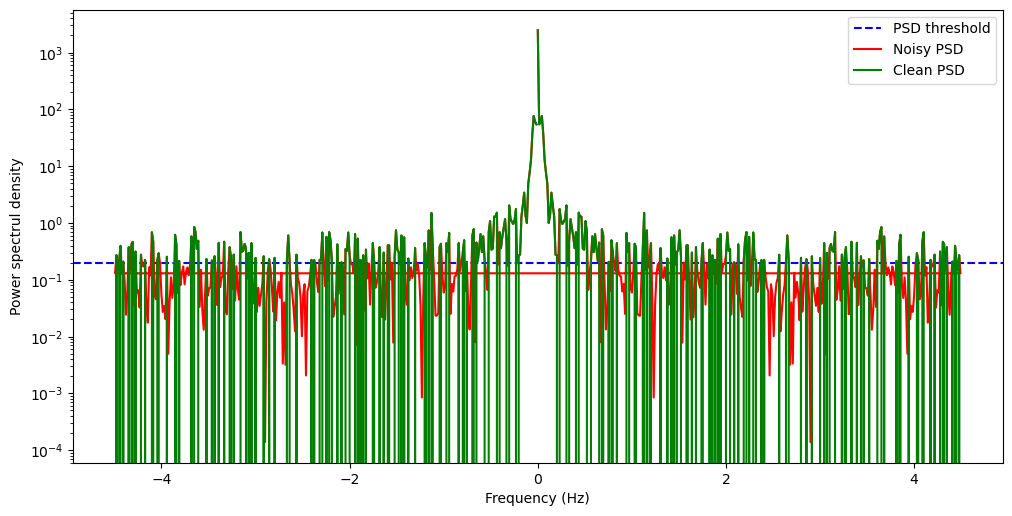

In [51]:
# Our target frequency is filtering_threshold
filtering_threshold = 0.2
indices = psd > filtering_threshold

# cleaning out the noise below the threshold power spectrul of frequencies
psd_clean = psd * indices

# ploting the clean signal PSD on top of noisy signal PSD
plt.figure(figsize=[12, 6])
plt.yscale('log')
plt.ylabel("Power spectrul density")
plt.xlabel("Frequency (Hz)")
plt.axhline(y=filtering_threshold, color='blue', linestyle='--',
            label="PSD threshold")
plt.plot(freqs, np.abs(psd), color="red", label="Noisy PSD")
plt.plot(freqs, np.abs(psd_clean), color='green', label="Clean PSD")
plt.legend(loc="upper right")
plt.show()

## Plot after cleaning out nosiy frequencies below threshold:

Text(0.5, 0, 'Frequency (Hz)')

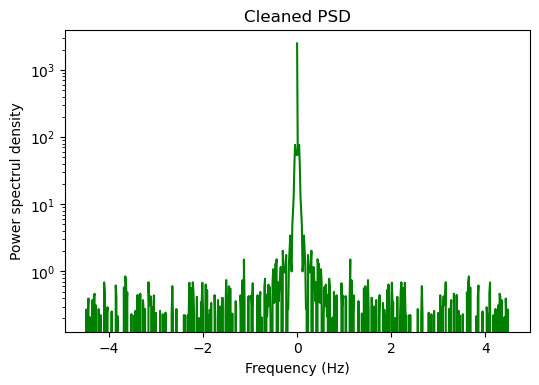

In [57]:
# Plot of cleaned psd
plt.title('Cleaned PSD')
plt.plot(freqs, np.abs(psd_clean), color='green', label="Clean PSD")
# Conversion to Log scale
plt.yscale('log')
plt.ylabel("Power spectrul density")
plt.xlabel("Frequency (Hz)")

### Applying the Inverse FFT to get back to the original signal after cleaning out noise:

In [58]:
# Imports
from scipy.fft import ifft

amplitude_fft_clean = amplitude * indices
amplitude_clean = ifft(amplitude_fft_clean.to_numpy())

## Comparing the cleaned Audio signal with noisy Audio signal:

Text(0.5, 0, 'Time (seconds)')

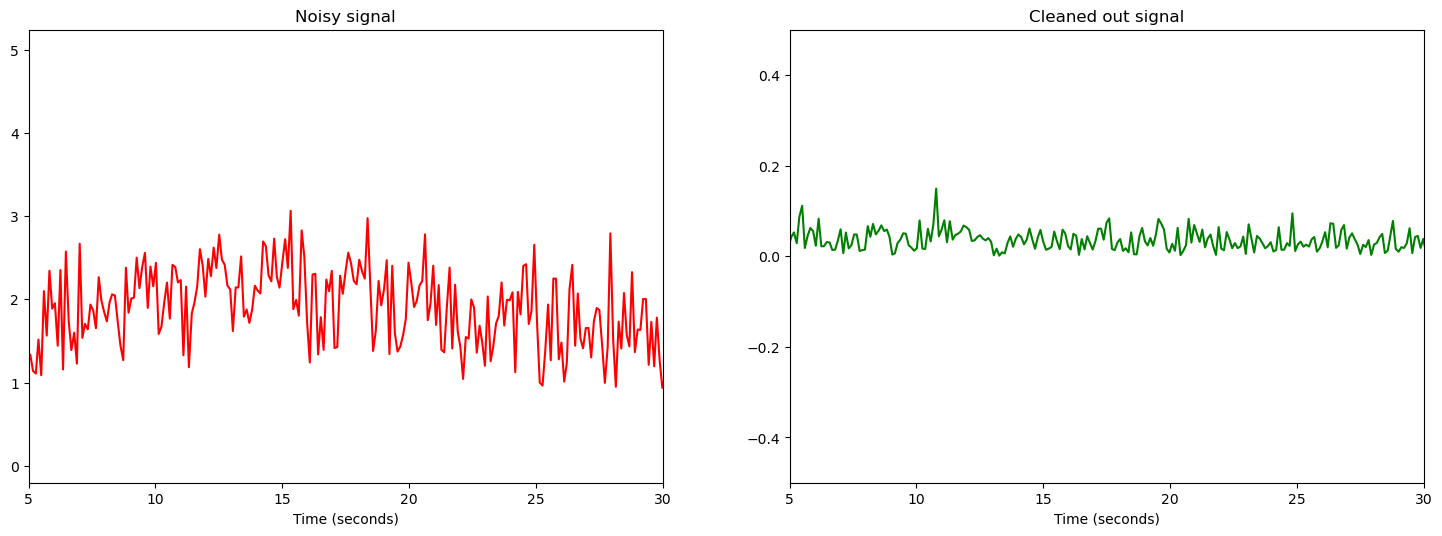

In [59]:
# ploting the noisy signal and clean signal
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot Noisy Signal
axs[0].set_title('Noisy signal')
axs[0].plot(np.abs(time), np.abs(amplitude), color="red", label="Noisy signal")
axs[0].set_xlabel("Amplitude")
axs[0].set_xlabel("Time (seconds)")
axs[0].set_xlim([5, 30])

# Plot cleaned signal
axs[1].set_title('Cleaned out signal')
axs[1].plot(np.abs(time), np.abs(amplitude_clean), color='green',
            label="Clean signal")
axs[1].set_ylim([-0.50, 0.50])
axs[1].set_xlim([5, 30])
axs[1].set_xlabel("Amplitude")
axs[1].set_xlabel("Time (seconds)")

Comparing with the original signal (at left) we can see that the filtered signal is much more cleaner ( at the right) . \
For our experiment, if we choose a higher threshold value, it will get rig of some original signals fromthe spectrum.But if we choose too low threshold value  it will keep a lot of noisy signal.